In [1]:
# Data Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To handke the data - utils - 
import time
import numpy as np
import pandas as pd 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

# Model construction
# from keras.datasets import mnist # Data set
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator # Create more images using the dataset

# Variable
train = "./data/train.csv"
test = "./data/test.csv"
submission = "./data/sample_submission.csv"

Using TensorFlow backend.
D:\Logiciel\Progra\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Logiciel\Progra\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Logiciel\Progra\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Logiciel\Progra\Anaconda\lib\site-packages\tensorflow\python\framewo

In [2]:
def showImage(img, format) :
    if (format=="784") :
        img = img.reshape(28,28)
    else :
        pass
    plt.imshow(img, cmap='Greys_r')
    plt.title("My Image")
    plt.show()
    
def get_convolutionnal_model(batch_size, input_shape, num_classes) :
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (4, 4), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))    
    model.add(Dropout(0.25))
    model.add(Dense(128, activation='relu'))  
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model, optimizer


In [4]:
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)
df_submission = pd.read_csv(submission)

In [5]:
df_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = df_train.label
X_train = df_train.drop("label", axis=1)
n_rows = int(np.sqrt(X_train.shape[1]))
n_columns = int(np.sqrt(X_train.shape[1]))
n_items_train = X_train.shape[0]
n_pixels = n_rows * n_columns
input_shape = (n_rows, n_columns, 1)
print("Initial Shape X_train : {}.".format(X_train.shape))
X_train = X_train.values.reshape(n_items_train, n_rows, n_columns, 1).astype('float32')
X_train = X_train/255
print("Final Shape X_train : {}.".format(X_train.shape))
# showImage(X_train[0], "784")

Initial Shape X_train : (42000, 784).
Final Shape X_train : (42000, 28, 28, 1).


Text(0.5, 1.0, 'Count of labels in the train set.')

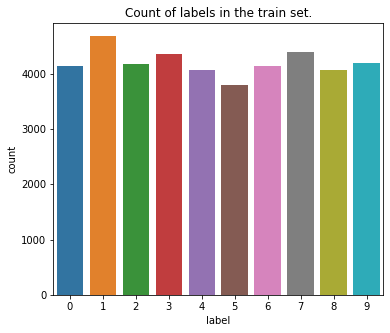

In [7]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.countplot(x=y_train).set_title("Count of labels in the train set.")

In [8]:
y_train_backup = y_train # use to modelize
print("Initial shape of y_train : ({},)".format(y_train.shape[0]))
y_train = np_utils.to_categorical(y_train)
num_class = len(y_train[0])
print("There are {} unique labels.".format(num_class))
print("Final shape of y_train : ({},{})".format(y_train.shape[0],y_train.shape[1]))

Initial shape of y_train : (42000,)
There are 10 unique labels.
Final shape of y_train : (42000,10)


In [9]:
model, my_optimizer = get_convolutionnal_model(len(X_train), input_shape, num_class)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
__________

In [10]:
# I increase the amount of data to reach a better score. 
#datagen = ImageDataGenerator(
#    featurewise_center=False, # set input mean to 0 over the dataset
#    featurewise_std_normalization=False, # set each sample mean to 0
#    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
#    width_shift_range=0.2, # randomly shift images horizontally (fraction of total width)
#    height_shift_range=0.2,
#    horizontal_flip=True) # randomly flip images - horizontaly

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42) 
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=0.5, random_state=42) 
old = time.time()
# y_model = model.fit(X_train, y_train, epochs=5, batch_size=5, verbose=1, validation_split=0.1, callbacks=[history]) # First version 
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=30), epochs=10, verbose=1, validation_data=datagen.flow(X_test, y_test), callbacks=[learning_rate_reduction])
print("It takes {} minutes to train the model.".format((time.time() - old)/60))

Epoch 1/10
1134/1134 [==============================] - 202s 178ms/step - loss: 0.1112 - acc: 0.9673 - val_loss: 0.0821 - val_acc: 0.9778
Epoch 2/10
  93/1134 [=>............................] - ETA: 2:52 - loss: 0.0911 - acc: 0.9706

In [ ]:
scores = model.evaluate(X_eval, y_eval)
print("Loss : ",int(scores[0]*100),"% / Accuracy : ",int(scores[1]*100),"%.")

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
print("Initial shape of the test set : {}".format(df_test.shape))
df_test = df_test.values.reshape(df_test.shape[0], n_rows, n_columns, 1).astype('float32')
df_test = df_test/255
print("Final shape of the test set : {}".format(df_test.shape))

In [ ]:
for index, item in enumerate(df_test) :
    data_to_predict = item.reshape(1, n_rows, n_columns, 1)
    prediction = model.predict(data_to_predict)
    p = np.where(prediction[0]==max(prediction[0]))[0][0]
    df_submission.loc[df_submission.index[index], "Label"] = int(p)

In [ ]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
ax = sns.kdeplot(y_train_backup, shade=True)
ax = sns.kdeplot(df_submission.Label, shade=True)
ax.set_title("Count of the labels")
ax.legend(["Train set", "My predictions"])

In [ ]:
df_submission.to_csv(submission, index=False)

In [ ]:
def generate_submission_file_based_on_prediction(result, source_file_path="data/sample_submission.csv"):
    df = pd.read_csv(
        filepath_or_buffer=source_file_path,
        sep=",",
    ).set_index("PassengerId")
    print(f"Entry: {df.shape}.")
    merge_df = pd.merge(
        left=df,
        right=result,
        how="left",
        left_index=True,
        right_index=True,
    )
    print(f"Output: {merge_df.shape}.")
    if df.shape[0] != merge_df.shape[0]:
        raise ValueError(f"Should be same size.")
    merge_df = merge_df[["Transported_x", "Transported_y"]]
    merge_df = merge_df.reset_index().rename(columns={"Transported_y": "Transported"}).drop(columns=["Transported_x"])
    merge_df.to_csv("data/my_submission.csv", sep=",", index=False)
    
def generate_random_submission(source_file_path="data/sample_submission.csv"):
    df = pd.read_csv(
        filepath_or_buffer=source_file_path,
        sep=",",
    )
    df["Label"] = df["Label"].apply(lambda x: random.choice(list(range(10))))
    print(f"File data/my_submission.csv successfully generated.\n")
    df.to_csv("data/my_submission.csv", sep=",", index=False)
    
def submit_submission(submission_file="data/sample_submission.csv"):
    with open("kaggle.json") as credential:
        json_credential = json.loads(credential.read())
        os.environ["KAGGLE_USERNAME"] = json_credential["username"]
        os.environ["KAGGLE_KEY"] = json_credential["key"]
    result = subprocess.check_output(
        [
            "kaggle",
            "competitions",
            "submit",
            "digit-recognizer",
            "-f",
            submission_file,
            "-m",
            f"{dt.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}: New submission",
        ]
    ).decode("utf-8")
    print(result)

def get_latest_score(team_id="10059555"):
    with open("kaggle.json") as credential:
        json_credential = json.loads(credential.read())
        os.environ["KAGGLE_USERNAME"] = json_credential["username"]
        os.environ["KAGGLE_KEY"] = json_credential["key"]
        os.environ["KAGGLE_TEAM_ID"] = team_id
    result = subprocess.check_output(["kaggle", "competitions", "submissions", "digit-recognizer"]).decode("utf-8")
    print(result)

generate_random_submission(to_predict)
submit_submission()
get_latest_score()